# Эвристический алгоритм раскраски графа
Точные методы раскраски графа сложны для программной реализации. Однако существует много эвристических процедур раскрашивания, позволяющих находить хорошие приближения для определения хроматического числа графа.   

Жадная раскраска в теории графов — раскраска вершин неориентированного графа, созданная жадным алгоритмом, который проходит вершины графа в некоторой предопределённой последовательности и назначает каждой вершине первый доступный цвет.   

Жадные алгоритмы, в общем случае, не дают минимально возможное число цветов


## Алгоритм:
 - Сортировать вершины графа по степеням убывания:  
 - Установить текущий цвет 
 - Выбрать очередную не раскрашенную вершину из списка и назначить ей новый цвет
 - Выбрать очередную не раскрашенную вершину и проверить условие смежности c уже раскрашенными в данный цвет. Если вершина не является смежной с данными вершинами, то также присвоить ей цвет.
 - Если все вершины графа раскрашены, то – конец алгоритма;

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

#### В худшем случае каждая вершина будет разного цвета => количество цветов должно быть не меньше количества вершин
("colors_collection" - дополнительный набор цветов)

In [3]:
colors = ['Red', 'Blue', 'Green', 'Yellow',  'Black', 'Pink', 'Orange', 'White', 'Gray', 'Purple', 'Brown', 'Navy']

In [4]:
#colors_collection = { 'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue': '#00BFFF', 'dimgray': '#696969', 'dodgerblue': '#1E90FF', 'firebrick': '#B22222', 'floralwhite': '#FFFAF0', 'forestgreen': '#228B22', 'fuchsia': '#FF00FF', 'gainsboro': '#DCDCDC', 'ghostwhite': '#F8F8FF', 'gold': '#FFD700', 'goldenrod': '#DAA520', 'gray': '#808080', 'green': '#008000', 'greenyellow': '#ADFF2F', 'honeydew': '#F0FFF0', 'hotpink': '#FF69B4', 'indianred': '#CD5C5C', 'indigo': '#4B0082', 'ivory': '#FFFFF0', 'khaki': '#F0E68C', 'lavender': '#E6E6FA', 'lavenderblush': '#FFF0F5', 'lawngreen': '#7CFC00', 'lemonchiffon': '#FFFACD', 'lightblue': '#ADD8E6', 'lightcoral': '#F08080', 'lightcyan': '#E0FFFF', 'lightgoldenrodyellow': '#FAFAD2', 'lightgreen': '#90EE90', 'lightgray': '#D3D3D3', 'lightpink': '#FFB6C1', 'lightsalmon': '#FFA07A', 'lightseagreen': '#20B2AA', 'lightskyblue': '#87CEFA', 'lightslategray': '#778899', 'lightsteelblue': '#B0C4DE', 'lightyellow': '#FFFFE0', 'lime': '#00FF00', 'limegreen': '#32CD32', 'linen': '#FAF0E6', 'magenta': '#FF00FF', 'maroon': '#800000', 'mediumaquamarine': '#66CDAA', 'mediumblue': '#0000CD', 'mediumorchid': '#BA55D3', 'mediumpurple': '#9370DB', 'mediumseagreen': '#3CB371', 'mediumslateblue': '#7B68EE', 'mediumspringgreen': '#00FA9A', 'mediumturquoise': '#48D1CC', 'mediumvioletred': '#C71585', 'midnightblue': '#191970', 'mintcream': '#F5FFFA', 'mistyrose': '#FFE4E1', 'moccasin': '#FFE4B5', 'navajowhite': '#FFDEAD', 'navy': '#000080', 'oldlace': '#FDF5E6', 'olive': '#808000', 'olivedrab': '#6B8E23', 'orange': '#FFA500', 'orangered': '#FF4500', 'orchid': '#DA70D6', 'palegoldenrod': '#EEE8AA', 'palegreen': '#98FB98', 'paleturquoise': '#AFEEEE', 'palevioletred': '#DB7093', 'papayawhip': '#FFEFD5', 'peachpuff': '#FFDAB9', 'peru': '#CD853F', 'pink': '#FFC0CB', 'plum': '#DDA0DD', 'powderblue': '#B0E0E6', 'purple': '#800080', 'red': '#FF0000', 'rosybrown': '#BC8F8F', 'royalblue': '#4169E1', 'saddlebrown': '#8B4513', 'salmon': '#FA8072', 'sandybrown': '#FAA460', 'seagreen': '#2E8B57', 'seashell': '#FFF5EE', 'sienna': '#A0522D', 'silver': '#C0C0C0', 'skyblue': '#87CEEB', 'slateblue': '#6A5ACD', 'slategray': '#708090', 'snow': '#FFFAFA', 'springgreen': '#00FF7F', 'steelblue': '#4682B4', 'tan': '#D2B48C', 'teal': '#008080', 'thistle': '#D8BFD8', 'tomato': '#FF6347', 'turquoise': '#40E0D0', 'violet': '#EE82EE', 'wheat': '#F5DEB3', 'white': '#FFFFFF', 'whitesmoke': '#F5F5F5', 'yellow': '#FFFF00', 'yellowgreen': '#9ACD32'} 

### Проверка на соответсвие цвета "color" цветам смежных вершины 

In [60]:
def coloring(G, vertex, color, colors_of_vertex):
    for neighbor in G.neighbors(vertex):
        color_of_neighbor = colors_of_vertex.get(neighbor, None)
        if color_of_neighbor == color:
            return False
    return True

### Раскраска вершины графа

In [61]:
def get_vertex_color(G,vertex, colors_of_vertex):
    for color in colors:
        if coloring(G, vertex, color,colors_of_vertex):
            return color

### Определение числа цветов, которые понадобились для раскраски графа

In [62]:
def min_color_number(colors_of_vertex):
    colors = []
    for i in colors_of_vertex:
        if colors_of_vertex[i] not in colors:
            colors.append(colors_of_vertex[i])
    return len(colors)    

### Основная функция, отвечающая за раскраску графа

In [63]:
def color_graph(G):
    sorted(G.degree, key=lambda x: x[1], reverse=True)
    colors_of_vertex={}
    for vertex in G.nodes():
        colors_of_vertex[vertex] = get_vertex_color(G,vertex, colors_of_vertex)
    min_color_num = min_color_number(colors_of_vertex)
    return colors_of_vertex, min_color_num

### Список цветов для соответствующих вершин графа

In [64]:
def get_color_list(colors_of_vertex):
    colors_list=[]
    for key in colors_of_vertex:
        colors_list.append(colors_of_vertex.get(key))
    return colors_list

### Создание графа из словаря (vertex: { adjacent vertex })

In [65]:
def create_graph(data:dict):
    G=nx.Graph()
    for key in data:
        G.add_node(key)
        vertexes = data.get(key)
        for v in vertexes:
            G.add_edge(key,v)
    return G     

### Отрисовка графа 

In [66]:
def Draw(G, layout = 0):
    colors_of_vertex, min_num = color_graph(G)
    colors_list = get_color_list(colors_of_vertex)    
    vertex = G.nodes()    
    if layout == 0:
        pos = nx.spring_layout(G)
    if layout == 1:
        pos = nx.shell_layout(G)
    print("The number of colors required for coloring the graph: ", min_num)
    nx.draw(G, pos, nodes = vertex, node_color = colors_list, with_labels = True)

### Сортировка вершин по убыванию

In [67]:
def sort_vertex(vertex):
    copy_g = vertex.copy()
    sorted_vertex = list()
    start_len = len(G)
    tmp = 0
    max_key = 0
    while 1:
        for key in copy_g:
            if len(copy_g.get(key)) > tmp:
                tmp = len(copy_g.get(key))
                max_key = key
        sorted_vertex.append(max_key)
        del copy_g[max_key]
        max_key = 0
        tmp = 0
        if len(sorted_vertex)==start_len:
            return sorted_vertex

# Тестовые примеры

The number of colors required for coloring the graph:  3


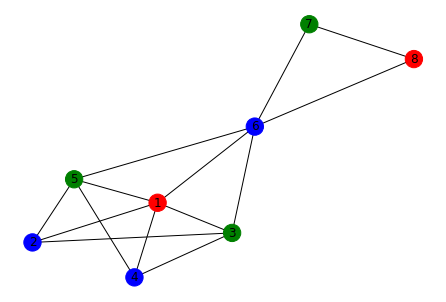

In [69]:
vertex = {
    1:{2,3,4,5,6},
    2:{3,5},
    3:{4},
    4:{5},
    5:{6},
    6:{3,7,8},
    7:{6,8},
    8:{7}
}

G = create_graph(vertex)
Draw(G)

The number of colors required for coloring the graph:  5


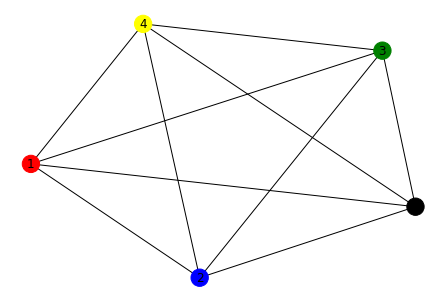

In [42]:
vertex = {
    1:{2,3,4,5},
    2:{1,3,4,5},
    3:{1,2,4,5},
    4:{1,2,3,5},
    5:{1,2,3,4}
}

G = create_graph(vertex)
Draw(G)

The number of colors required for coloring the graph:  4


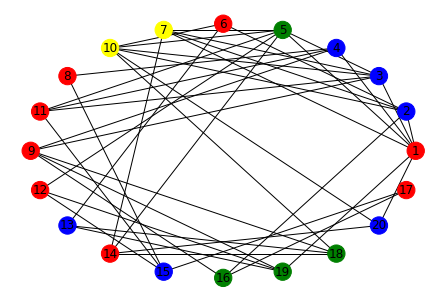

In [43]:
vertex = {
    1:{2,3,4,5},
    2:{1,6,7},
    3:{1,10,5},
    4:{1,8,9,11},
    5:{12},
    6:{13},
    7:{14,1,3,5},
    8:{15},
    9:{16,3,18,19},
    10:{20,6,5,2},
    11:{3,4,5},
    12:{15},
    13:{18,19},
    14:{20,5},
    15:{11,17},
    16:{2,17},
    17:{16},
    18:{10,14},
    19:{1,12,13},
    20:{1},
}
G = create_graph(vertex)
Draw(G,1)

The number of colors required for coloring the graph:  4


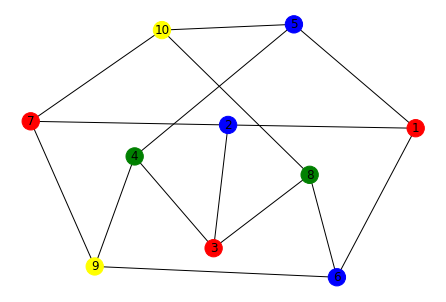

In [58]:
vertex = {
    1:{2,5,6},
    2:{3,1,7},
    3:{4,2,8},
    4:{5,3,9},
    5:{1,4,10},
    6:{8,9,1},
    7:{9,10,2},
    8:{10,6,3},
    9:{6,7,4},
    10:{7,8,5}
}
G = create_graph(vertex)
Draw(G)